# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_key import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1 
    
    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
    
    # Log the URL, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data   
        city_weather = requests.get(city_url).json()

       
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... Error: {e}")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | arraial do cabo
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | remire-montjoly
Processing Record 6 of Set 1 | tura
Processing Record 7 of Set 1 | rock springs
Processing Record 8 of Set 1 | st. john's
Processing Record 9 of Set 1 | bayevo
Processing Record 10 of Set 1 | bathsheba
Processing Record 11 of Set 1 | talnakh
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | margaret river
Processing Record 14 of Set 1 | keflavik
Processing Record 15 of Set 1 | mamou
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | stanley
Processing Record 18 of Set 1 | badger
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | guiria
City not found. Skipping... Error: 'coord'
Processing Record 21 of Set 1 | wailua homesteads
Processing Record 22 

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
print(f"Record Count: {city_data_df.shape[0]}")

Record Count: 594


In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,16.46,85,100,2.06,US,1725947526
1,arraial do cabo,-22.9661,-42.0278,22.15,86,0,12.55,BR,1725947541
2,waitangi,-43.9535,-176.5597,9.90,93,18,0.89,NZ,1725947526
3,grytviken,-54.2811,-36.5092,0.46,90,100,3.74,GS,1725947531
4,remire-montjoly,4.9167,-52.2667,25.02,94,59,0.00,GF,1725947598


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,16.46,85,100,2.06,US,1725947526
1,arraial do cabo,-22.9661,-42.0278,22.15,86,0,12.55,BR,1725947541
2,waitangi,-43.9535,-176.5597,9.90,93,18,0.89,NZ,1725947526
3,grytviken,-54.2811,-36.5092,0.46,90,100,3.74,GS,1725947531
4,remire-montjoly,4.9167,-52.2667,25.02,94,59,0.00,GF,1725947598


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

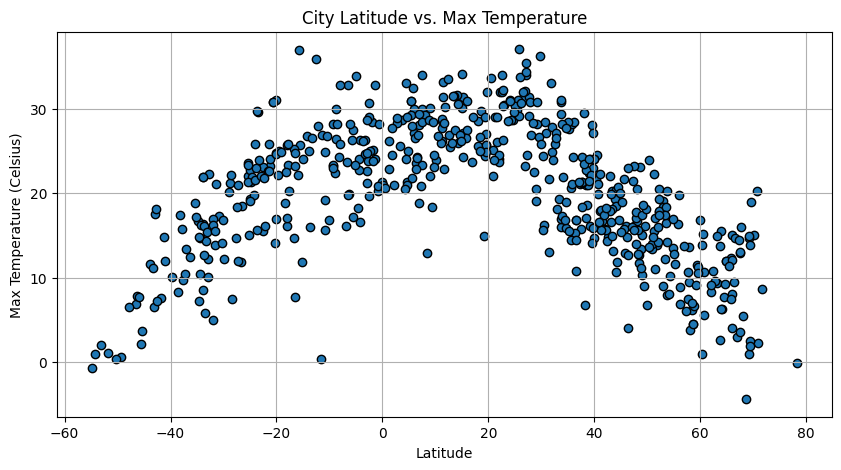

In [10]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 5))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

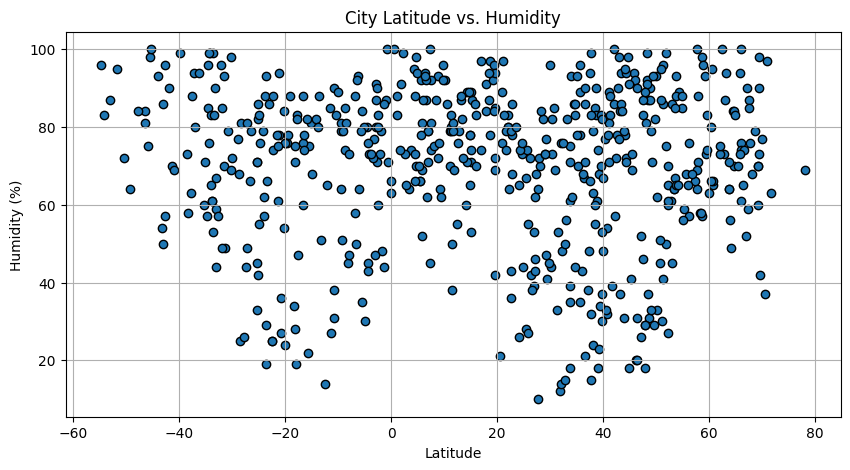

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 5))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

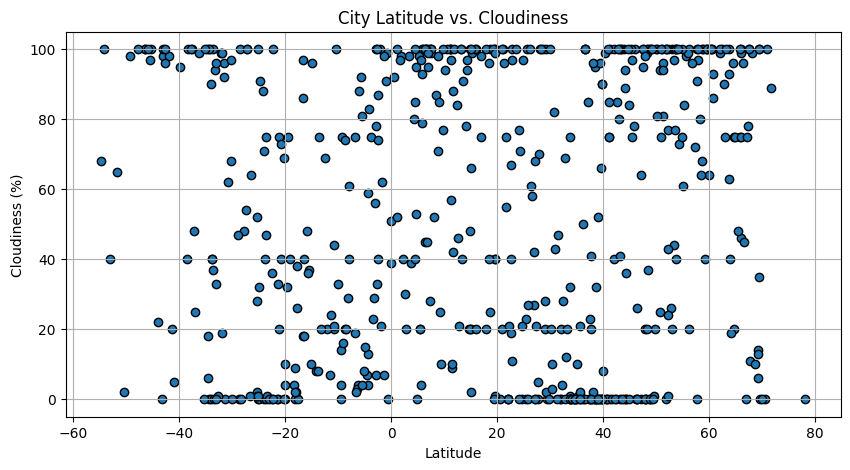

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 5))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o', edgecolor='black')
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

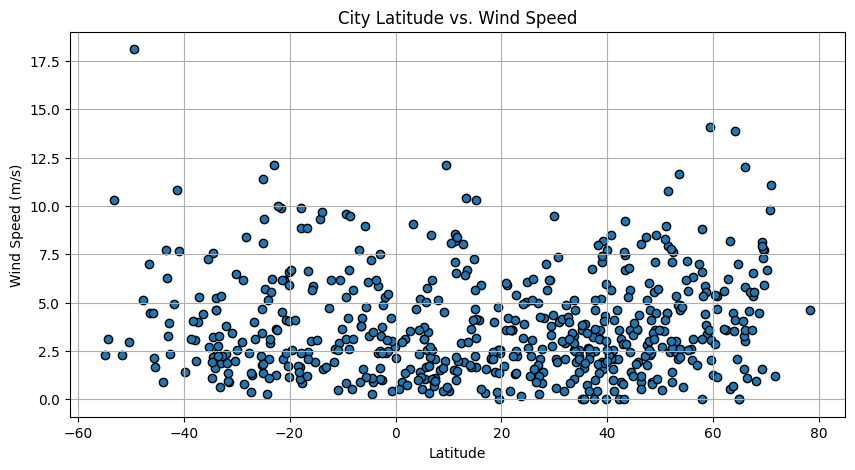

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 5))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,16.46,85,100,2.06,US,1725947526
4,remire-montjoly,4.9167,-52.2667,25.02,94,59,0.00,GF,1725947598
5,tura,25.5198,90.2201,31.52,66,26,1.50,IN,1725947557
6,rock springs,41.5875,-109.2029,18.69,42,0,5.66,US,1725947688
7,st. john's,47.5649,-52.7093,16.10,86,100,5.14,CA,1725947531


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,arraial do cabo,-22.9661,-42.0278,22.15,86,0,12.55,BR,1725947541
2,waitangi,-43.9535,-176.5597,9.90,93,18,0.89,NZ,1725947526
3,grytviken,-54.2811,-36.5092,0.46,90,100,3.74,GS,1725947531
12,margaret river,-33.9500,115.0667,17.37,60,82,6.22,AU,1725947533
15,hermanus,-34.4187,19.2345,11.56,72,0,7.60,ZA,1725947524


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value for Northern Hemisphere: 0.5938169927071939


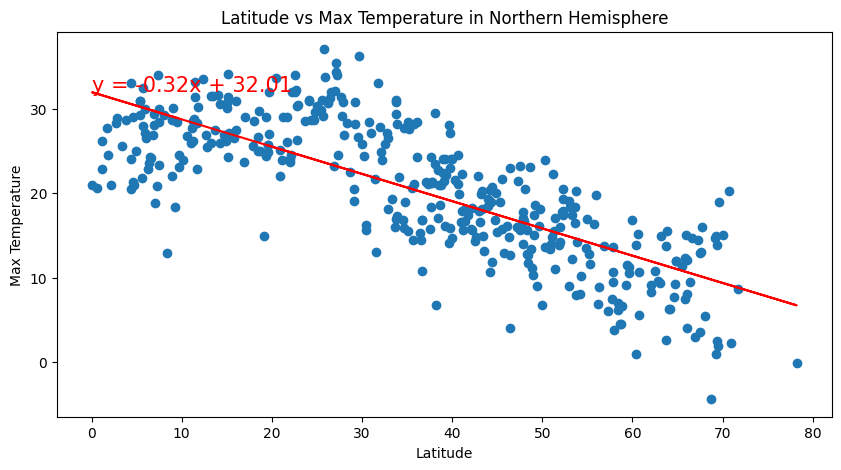

In [56]:
# Linear regression on Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]        
y_values_northern = northern_hemi_df["Max Temp"]  

# Perform linear regression
(slope_northern, intercept_northern, rvalue_northern, pvalue_northern, stderr_northern) = linregress(x_values_northern, y_values_northern)

# Get regression values
regress_values_northern = x_values_northern * slope_northern + intercept_northern

# Create line equation string
line_eq_northern = f"y = {round(slope_northern, 2)}x + {round(intercept_northern, 2)}"

# Create Plot for Northern Hemisphere
plt.figure(figsize=(10, 5))
plt.scatter(x_values_northern, y_values_northern)
plt.plot(x_values_northern, regress_values_northern, "r-")

# Annotate plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Latitude vs Max Temperature in Northern Hemisphere')
plt.annotate(line_eq_northern, (min(x_values_northern), max(y_values_northern) - 5), fontsize=15, color="red")

# Print r squared value
print(f"The r-squared value for Northern Hemisphere: {rvalue_northern**2}")

# Show plot
plt.show()

The r-squared value for the Southern Hemisphere is: 0.5234111670160823


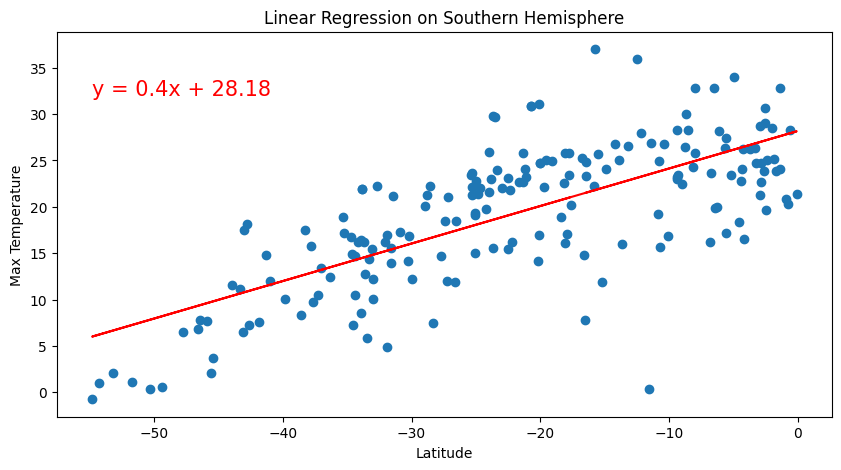

In [17]:
#Linear regression onSouthern Hemisphere 
x_values_southern = southern_hemi_df["Lat"].astype(float)  
y_values_southern = southern_hemi_df["Max Temp"].astype(float)  

# Perform linear regression
(slope_southern, intercept_southern, rvalue_southern, pvalue_southern, stderr_southern) = linregress(x_values_southern, y_values_southern)

# Get regression values
regress_values_southern = x_values_southern * slope_southern + intercept_southern

# Create line equation string
line_eq_southern = f"y = {round(slope_southern, 2)}x + {round(intercept_southern, 2)}"

# Create Plot
plt.figure(figsize=(10, 5))
plt.scatter(x_values_southern, y_values_southern)
plt.plot(x_values_southern, regress_values_southern, "r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Linear Regression on Southern Hemisphere')

# Annotate the line equation on the plot

plt.annotate(line_eq_southern, (min(x_values_southern), max(y_values_southern) - 5), fontsize=15, color="red")

# Print r squared value
print(f"The r-squared value for the Southern Hemisphere is: {rvalue_southern**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The linear regression analysis of maximum temperature versus latitude for the Southern Hemisphere shows a positive slope. According to this dataset, maximum temperatures increase with higher latitudes.

### Humidity vs. Latitude Linear Regression Plot

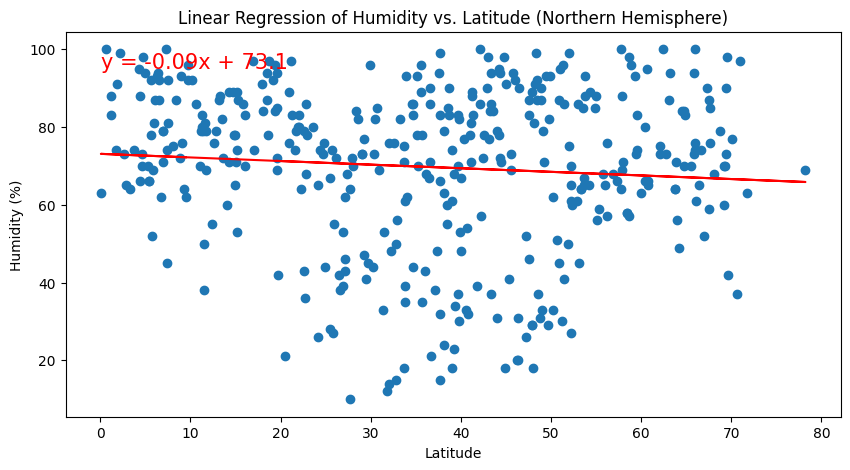

The r-squared value for the Northern Hemisphere is: 0.007295421042352064


In [57]:
# Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"].astype(float)
y_values_northern = northern_hemi_df["Humidity"].astype(float)

(slope_northern, intercept_northern, rvalue_northern, pvalue_northern, stderr_northern) = linregress(x_values_northern, y_values_northern)

# Get regression values
regress_values_northern = x_values_northern * slope_northern + intercept_northern

# Create line equation string
line_eq_northern = f"y = {round(slope_northern, 2)}x + {round(intercept_northern, 2)}"

# Create Plot
plt.figure(figsize=(10, 5))
plt.scatter(x_values_northern, y_values_northern)
plt.plot(x_values_northern, regress_values_northern, "r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Linear Regression of Humidity vs. Latitude (Northern Hemisphere)')
plt.annotate(line_eq_northern, (min(x_values_northern), max(y_values_northern) - 5), fontsize=15, color="red")
plt.show()

# Print r-squared value
print(f"The r-squared value for the Northern Hemisphere is: {rvalue_northern**2}")


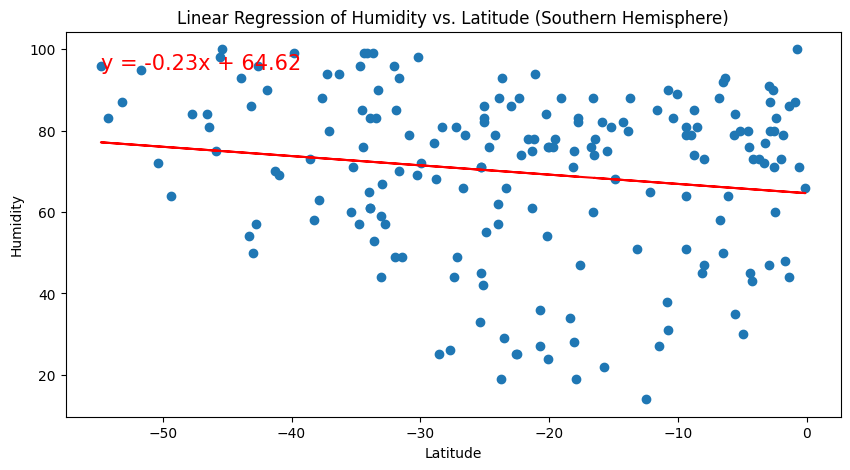

The r-squared value for the Southern Hemisphere is: 0.023854637944484395


In [58]:
# Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"].astype(float)
y_values_southern = southern_hemi_df["Humidity"].astype(float)


# Perform linear regression
slope_southern, intercept_southern, rvalue_southern, pvalue_southern, stderr_southern = linregress(x_values_southern, y_values_southern)

# Get regression values
regress_values_southern = x_values_southern * slope_southern + intercept_southern

# Create line equation string
line_eq_southern = f"y = {round(slope_southern, 2)}x + {round(intercept_southern, 2)}"

# Create Plot
plt.figure(figsize=(10, 5))
plt.scatter(x_values_southern, y_values_southern)
plt.plot(x_values_southern, regress_values_southern, "r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Linear Regression of Humidity vs. Latitude (Southern Hemisphere)')
plt.annotate(line_eq_southern, (min(x_values_southern), max(y_values_southern)-5), fontsize=15, color="red")

plt.show()

# Print r-squared value
print(f"The r-squared value for the Southern Hemisphere is: {rvalue_southern**2}")

**Discussion about the linear relationship:** The regression analysis of humidity versus latitude in the Southern Hemisphere reveals a clear trend: as latitude increases, humidity tends to decrease. This negative relationship is characterized by a downward-sloping regression line.

### Cloudiness vs. Latitude Linear Regression Plot

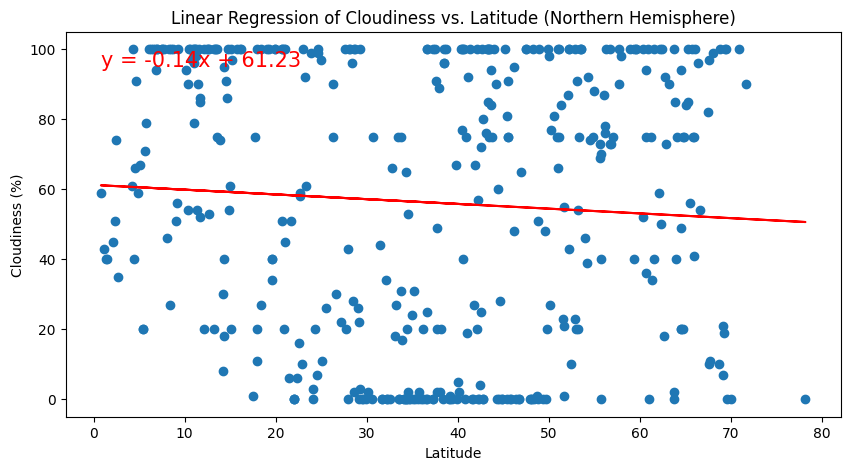

The r-squared value for the Northern Hemisphere is: 0.0042803120730475945


In [18]:
# Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"].astype(float)
y_values_northern = northern_hemi_df["Cloudiness"].astype(float)

(slope_northern, intercept_northern, rvalue_northern, pvalue_northern, stderr_northern) = linregress(x_values_northern, y_values_northern)
# Get regression values
regress_values_northern = x_values_northern * slope_northern + intercept_northern

# Create line equation string
line_eq_northern = f"y = {round(slope_northern, 2)}x + {round(intercept_northern, 2)}"

# Create Plot
plt.figure(figsize=(10, 5))
plt.scatter(x_values_northern, y_values_northern)
plt.plot(x_values_northern, regress_values_northern, "r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Linear Regression of Cloudiness vs. Latitude (Northern Hemisphere)')
plt.annotate(line_eq_northern, (min(x_values_northern), max(y_values_northern) - 5), fontsize=15, color="red")
plt.show()

# Print r-squared value
print(f"The r-squared value for the Northern Hemisphere is: {rvalue_northern**2}")

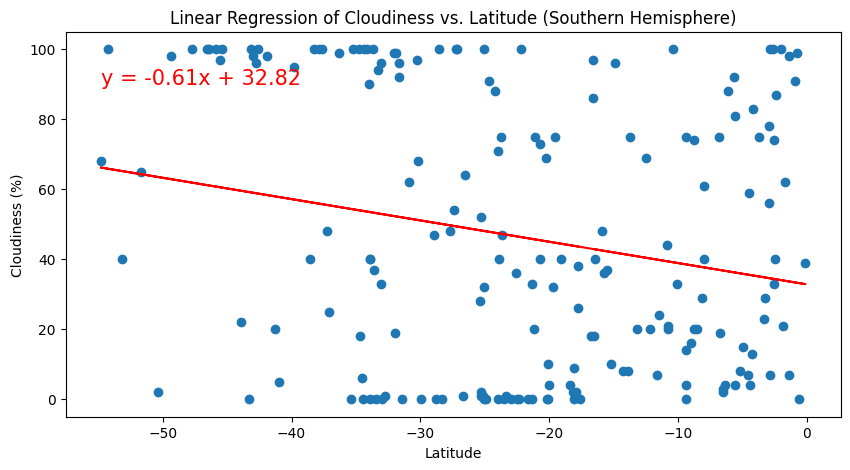

The r-squared value for the Southern Hemisphere is: 0.04833121765741927


In [60]:
# Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"].astype(float)
y_values_southern = southern_hemi_df["Cloudiness"].astype(float)

slope_southern, intercept_southern, rvalue_southern, pvalue_southern, stderr_southern = linregress(x_values_southern, y_values_southern)
# Get regression values
regress_values_southern = x_values_southern * slope_southern + intercept_southern
# Create line equation string
line_eq_southern = f"y = {round(slope_southern, 2)}x + {round(intercept_southern, 2)}"

# Create Plot
plt.figure(figsize=(10, 5))
plt.scatter(x_values_southern, y_values_southern)
plt.plot(x_values_southern, regress_values_southern, "r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Linear Regression of Cloudiness vs. Latitude (Southern Hemisphere)')
plt.annotate(line_eq_southern, (min(x_values_southern), max(y_values_southern) - 10), fontsize=15, color="red")
plt.show()

# Print r-squared value
print(f"The r-squared value for the Southern Hemisphere is: {rvalue_southern**2}")

**Discussion about the linear relationship:** shows a negative slope, suggesting that as latitude increases, cloudiness tends to decrease slightly. This implies a minor negative correlation between the two variables, where cloudiness tends to be somewhat lower at higher latitudes. However, the relationship between latitude and cloudiness is weak, as indicated by the low r-squared value. 

### Wind Speed vs. Latitude Linear Regression Plot

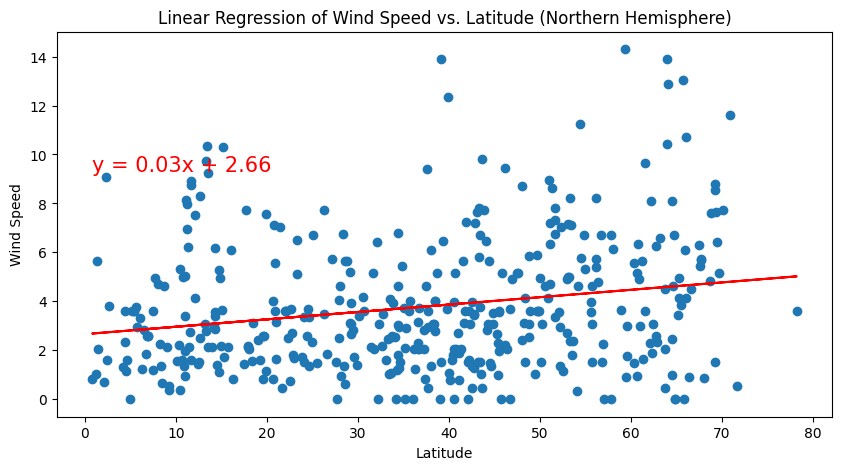

The r-squared value for the Northern Hemisphere is: 0.045139131245698724


In [29]:
# Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Wind Speed"]
# Perform linear regression
slope_northern, intercept_northern, rvalue_northern, pvalue_northern, stderr_northern = linregress(x_values_northern, y_values_northern)

# Get regression values
regress_values_northern = x_values_northern * slope_northern + intercept_northern

# Create line equation string
line_eq_northern = f"y = {round(slope_northern, 2)}x + {round(intercept_northern, 2)}"

# Create Plot for Northern Hemisphere
plt.figure(figsize=(10, 5))
plt.scatter(x_values_northern, y_values_northern)
plt.plot(x_values_northern, regress_values_northern, "r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Linear Regression of Wind Speed vs. Latitude (Northern Hemisphere)')
plt.annotate(line_eq_northern, (min(x_values_northern), max(y_values_northern) - 5), fontsize=15, color="red")
plt.show()

# Print r-squared value for Northern Hemisphere
print(f"The r-squared value for the Northern Hemisphere is: {rvalue_northern**2}")


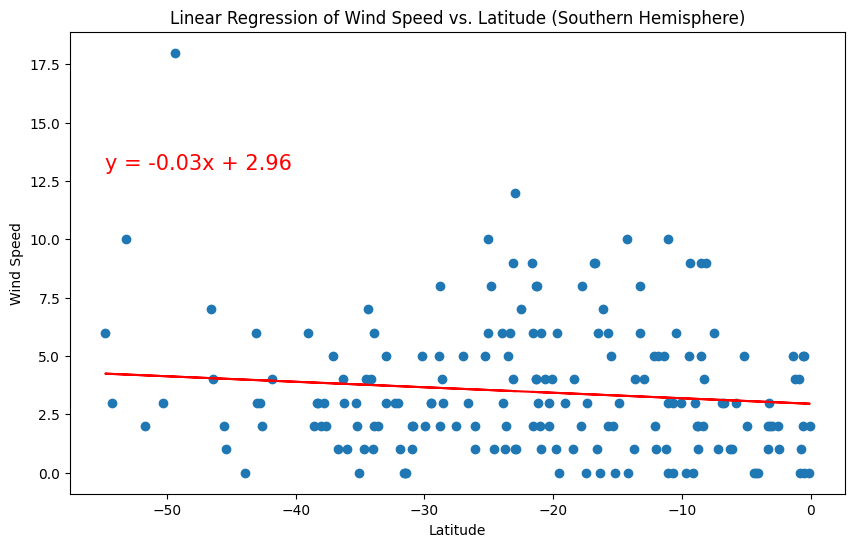

The r-squared value for the Southern Hemisphere is: 0.014382287700331502


In [60]:
# Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"].astype(float)
y_values_southern = southern_hemi_df["Wind Speed"].astype(int)


# Perform linear regression
slope_southern, intercept_southern, rvalue_southern, pvalue_southern, stderr_southern = linregress(x_values_southern, y_values_southern)


# Get regression values
regress_values_southern = x_values_southern * slope + intercept_southern

# Create line equation string

line_eq_southern = f"y = {slope_southern:.2f}x + {intercept_southern:.2f}"

# Create Plot for Southern Hemisphere
plt.figure(figsize=(10, 6))
plt.scatter(x_values_southern, y_values_southern)
plt.plot(x_values_southern, regress_values_southern, "r-")

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Linear Regression of Wind Speed vs. Latitude (Southern Hemisphere)')

# Add annotation with line equation
plt.annotate(line_eq_southern, (min(x_values_southern), max(y_values_southern) - 5), fontsize=15, color="red")


# Show plot
plt.show()

# Print r-squared value for Southern Hemisphere
print(f"The r-squared value for the Southern Hemisphere is: {rvalue_southern**2}")

**Discussion about the linear relationship:** The analysis indicates that latitude is not a strong predictor of wind speed in the Southern Hemisphere based on this linear regression model. There is a slight negative relationship between latitude and wind speed. As latitude increases, the wind speed is predicted to decrease very slightly, however, the size of this change is small compared with the Northern Hemisphere.